Notebook pour compter les pourcentages de pixels de chaque classe des masques

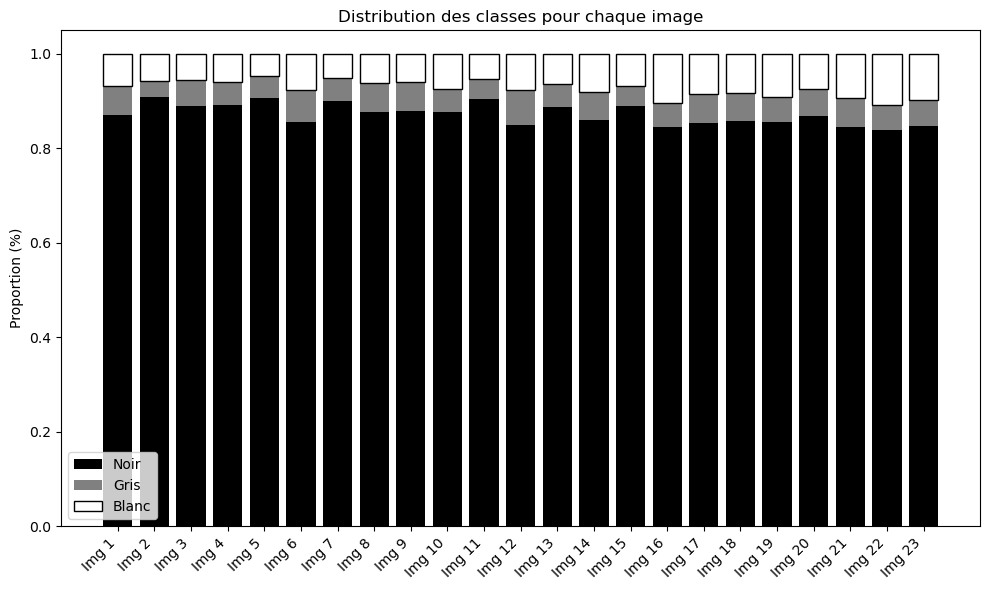

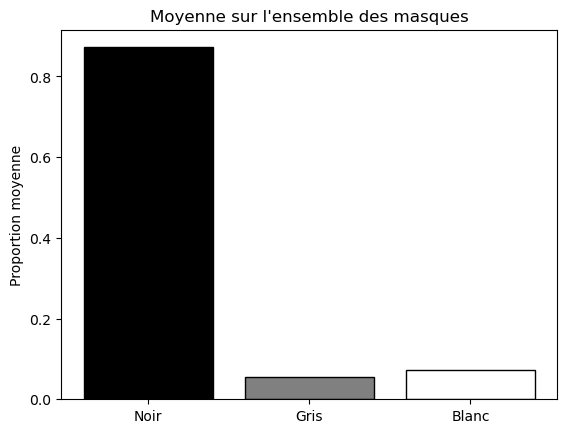

In [2]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Dossier contenant les masques
dir = Path("/home/usrs/hnoel/RAVIR Dataset/train/training_masks")

# Liste pour stocker les résultats
results = []

# Boucle sur chaque image PNG
for img_path in sorted(dir.glob("*.png")):
    # Ouvre et convertit en numpy array
    img = np.array(Image.open(img_path).convert("RGB"))
    total = img.shape[0] * img.shape[1]
    
    # Création de masques booléens
    black = np.all(img == [0, 0, 0], axis=-1)
    gray  = np.all(img == [128, 128, 128], axis=-1)
    white = np.all(img == [255, 255, 255], axis=-1)
    
    # Comptage et normalisation
    counts = {
        "black": np.sum(black) / total,
        "gray":  np.sum(gray) / total,
        "white": np.sum(white) / total
    }
    results.append(counts)

# Conversion en structure numpy pour analyse globale
black_vals = [r["black"] for r in results]
gray_vals  = [r["gray"]  for r in results]
white_vals = [r["white"] for r in results]

# Moyennes
mean_black = np.mean(black_vals)
mean_gray  = np.mean(gray_vals)
mean_white = np.mean(white_vals)

# ==============================
# 📊 AFFICHAGE : Histogramme empilé
# ==============================
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(results))

ax.bar(x, black_vals, label="Noir", color="black")
ax.bar(x, gray_vals, bottom=black_vals, label="Gris", color="gray")
ax.bar(x, white_vals, bottom=np.array(black_vals)+np.array(gray_vals), label="Blanc", color="white", edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels([f"Img {i+1}" for i in range(len(results))], rotation=45, ha="right")
ax.set_ylabel("Proportion (%)")
ax.set_title("Distribution des classes pour chaque image")
ax.legend()
plt.tight_layout()
plt.show()

# ==============================
# 🧮 AFFICHAGE : Moyenne globale
# ==============================
fig2, ax2 = plt.subplots()
ax2.bar(["Noir", "Gris", "Blanc"], [mean_black, mean_gray, mean_white],
        color=["black", "gray", "white"], edgecolor='black')
ax2.set_ylabel("Proportion moyenne")
ax2.set_title("Moyenne sur l'ensemble des masques")
plt.show()


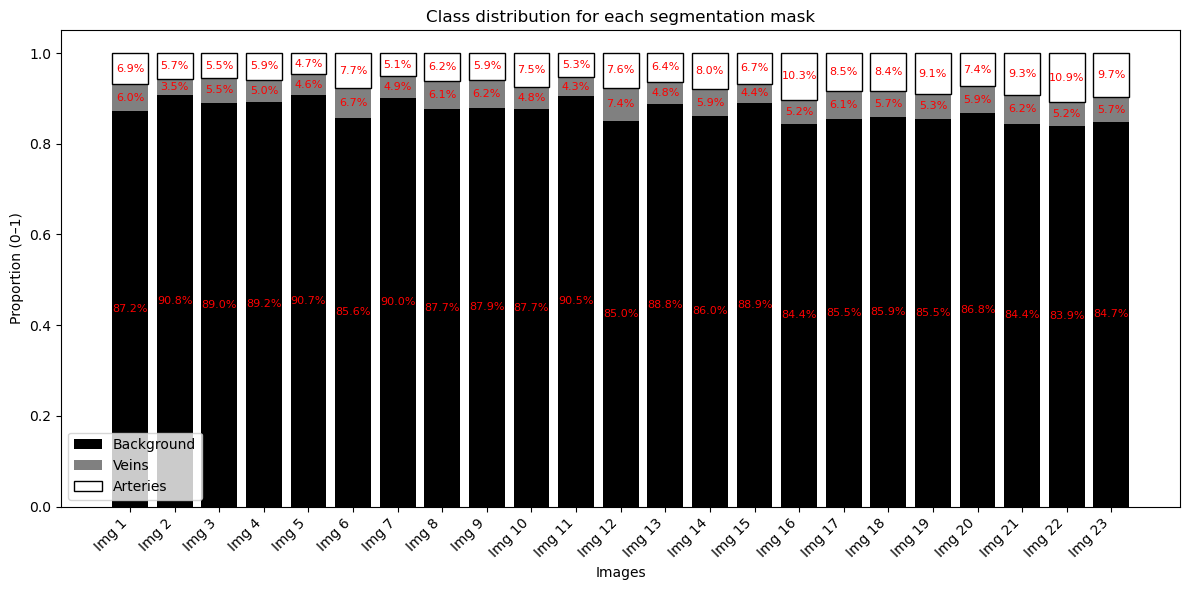

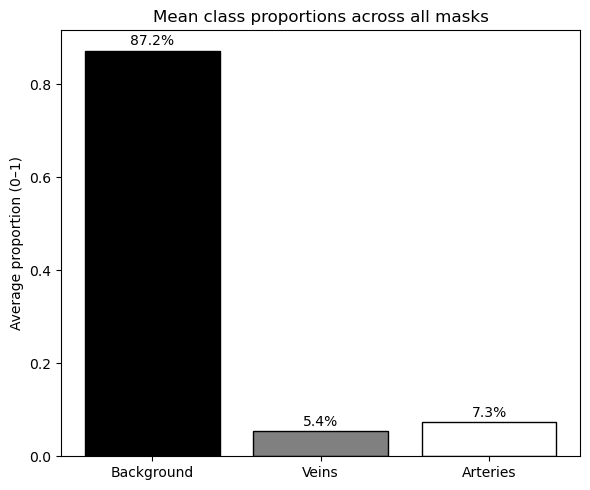

In [3]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing mask images
dir = Path("/home/usrs/hnoel/RAVIR Dataset/train/training_masks")

results = []

# --- Process each PNG image ---
for img_path in sorted(dir.glob("*.png")):
    img = np.array(Image.open(img_path).convert("RGB"))
    total = img.shape[0] * img.shape[1]

    # Create boolean masks for each class
    background = np.all(img == [0, 0, 0], axis=-1)
    veins      = np.all(img == [128, 128, 128], axis=-1)
    arteries   = np.all(img == [255, 255, 255], axis=-1)

    # Count pixels and normalize
    counts = {
        "Background": np.sum(background) / total,
        "Veins": np.sum(veins) / total,
        "Arteries": np.sum(arteries) / total
    }
    results.append(counts)

# --- Convert to NumPy arrays for global analysis ---
bg_vals = [r["Background"] for r in results]
vein_vals = [r["Veins"] for r in results]
art_vals = [r["Arteries"] for r in results]

# Mean values
mean_bg = np.mean(bg_vals)
mean_vein = np.mean(vein_vals)
mean_art = np.mean(art_vals)

# ==============================
# 📊 STACKED BAR CHART PER IMAGE
# ==============================
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results))

bars_bg = ax.bar(x, bg_vals, label="Background", color="black")
bars_vein = ax.bar(x, vein_vals, bottom=bg_vals, label="Veins", color="gray")
bars_art = ax.bar(x, art_vals, bottom=np.array(bg_vals)+np.array(vein_vals), 
                  label="Arteries", color="white", edgecolor='black')

# Add annotations with percentages
for bars in [bars_bg, bars_vein, bars_art]:
    for bar in bars:
        height = bar.get_height()
        if height > 0.01:  # avoid clutter for small values
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f"{height*100:.1f}%",
                ha="center", va="center", fontsize=8, color="red"
            )

ax.set_xticks(x)
ax.set_xticklabels([f"Img {i+1}" for i in range(len(results))], rotation=45, ha="right")
ax.set_ylabel("Proportion (0–1)")
ax.set_xlabel("Images")
ax.set_title("Class distribution for each segmentation mask")
ax.legend()
plt.tight_layout()
plt.show()

# ==============================
# 📈 GLOBAL MEAN BAR CHART
# ==============================
fig2, ax2 = plt.subplots(figsize=(6, 5))
classes = ["Background", "Veins", "Arteries"]
means = [mean_bg, mean_vein, mean_art]
colors = ["black", "gray", "white"]

bars = ax2.bar(classes, means, color=colors, edgecolor='black')
ax2.set_ylabel("Average proportion (0–1)")
ax2.set_title("Mean class proportions across all masks")

# Annotate bars with exact percentages
for bar, val in zip(bars, means):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 0.005,
             f"{val*100:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


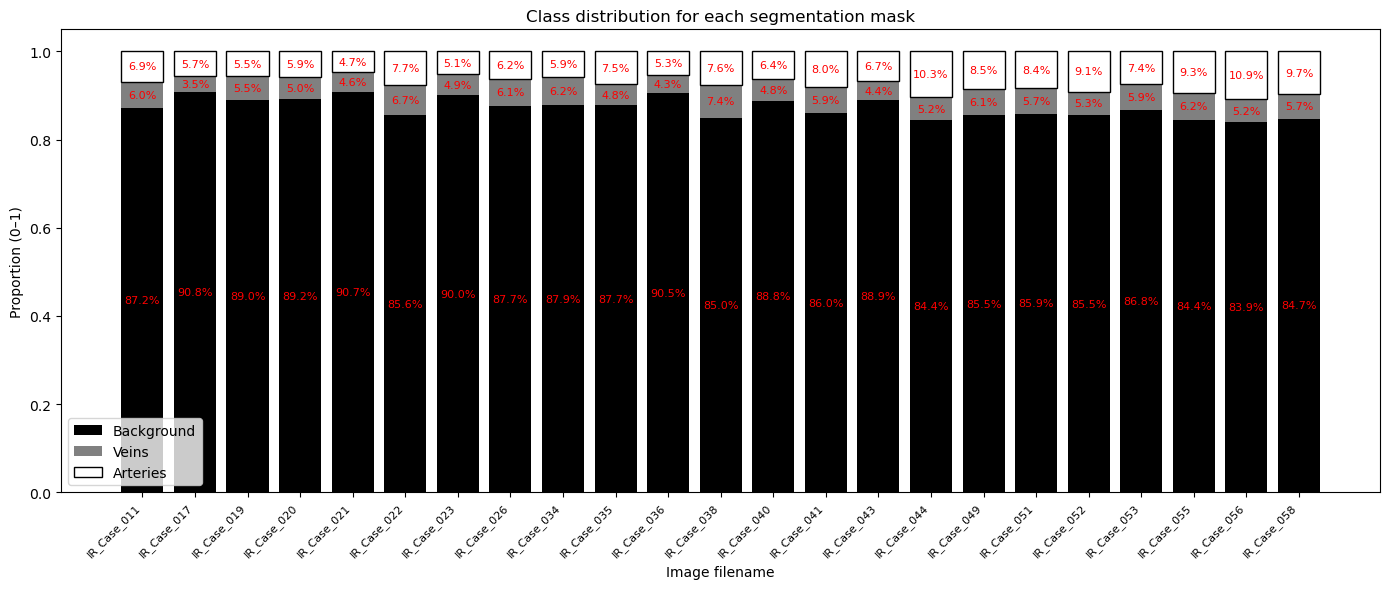

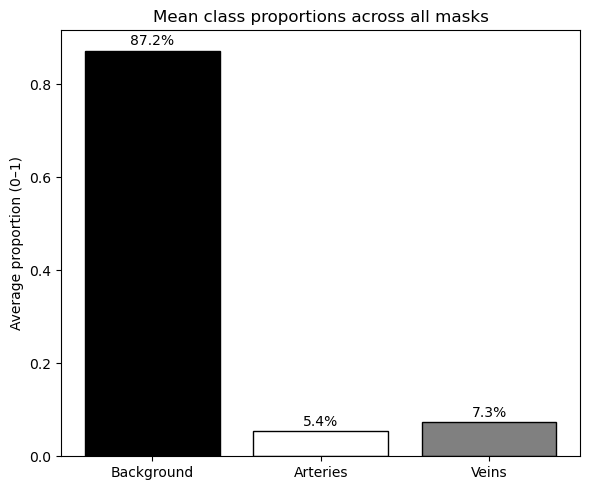

In [1]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing mask images
dir = Path("/home/usrs/hnoel/RAVIR Dataset/train/training_masks")

results = []
filenames = []

# --- Process each PNG image ---
for img_path in sorted(dir.glob("*.png")):
    img = np.array(Image.open(img_path).convert("RGB"))
    total = img.shape[0] * img.shape[1]

    # Create boolean masks for each class
    background = np.all(img == [0, 0, 0], axis=-1)
    veins      = np.all(img == [128, 128, 128], axis=-1)
    arteries   = np.all(img == [255, 255, 255], axis=-1)

    # Count pixels and normalize
    counts = {
        "Background": np.sum(background) / total,
        "Veins": np.sum(veins) / total,
        "Arteries": np.sum(arteries) / total
    }
    results.append(counts)
    filenames.append(img_path.stem)  # <-- no .png, only the base name

# --- Convert to NumPy arrays for global analysis ---
bg_vals = [r["Background"] for r in results]
vein_vals = [r["Veins"] for r in results]
art_vals = [r["Arteries"] for r in results]

# Mean values
mean_bg = np.mean(bg_vals)
mean_vein = np.mean(vein_vals)
mean_art = np.mean(art_vals)

# ==============================
# 📊 STACKED BAR CHART PER IMAGE
# ==============================
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(results))

bars_bg = ax.bar(x, bg_vals, label="Background", color="black")
bars_vein = ax.bar(x, vein_vals, bottom=bg_vals, label="Veins", color="gray")
bars_art = ax.bar(x, art_vals, bottom=np.array(bg_vals)+np.array(vein_vals), 
                  label="Arteries", color="white", edgecolor='black')

# Add annotations with percentages
for bars in [bars_bg, bars_vein, bars_art]:
    for bar in bars:
        height = bar.get_height()
        if height > 0.01:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f"{height*100:.1f}%",
                ha="center", va="center", fontsize=8, color="red"
            )

ax.set_xticks(x)
ax.set_xticklabels(filenames, rotation=45, ha="right", fontsize=8)

ax.set_ylabel("Proportion (0–1)")
ax.set_xlabel("Image filename")
ax.set_title("Class distribution for each segmentation mask")
ax.legend()
plt.tight_layout()
plt.show()

# ==============================
# 📈 GLOBAL MEAN BAR CHART
# ==============================
fig2, ax2 = plt.subplots(figsize=(6, 5))
classes = ["Background", "Arteries", "Veins"]
means = [mean_bg, mean_vein, mean_art]
colors = ["black", "white", "gray"]

bars = ax2.bar(classes, means, color=colors, edgecolor='black')
ax2.set_ylabel("Average proportion (0–1)")
ax2.set_title("Mean class proportions across all masks")

# Annotate bars with exact percentages
for bar, val in zip(bars, means):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 0.005,
             f"{val*100:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()
